# Week 2 - Counting Words & Phrases
Sabina Hartnett


In [9]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [21]:
#corpus_name = "/Users/sabinahartnett/Desktop/UChicago/ContentAnalysis21/Homework-Notebooks/week-2/Movies" 
#this is a zip file downloaded from the Corpus of Contemporary American English
#instructions:
#https://canvas.uchicago.edu/courses/33672/pages/accessing-computational-resources-and-corpora

katahdin_corpus = r"/Users/sabinahartnett/Desktop/UChicago/ContentAnalysis21/Homework-Notebooks/week-2/NewKatahdinWoodsandWaters.csv"

In [39]:
import pandas as pd
#file = open(os.path.join(pathName, i), "rU")
#df_ktdn = pd.read_csv(katahdin_corpus)
df_ktdn = pd.read_csv(r'/Users/sabinahartnett/Desktop/UChicago/ContentAnalysis21/Homework-Notebooks/week-2/NewKatahdinWoodsandWaters.csv')

In [29]:
#create texts raw dict

#texts_raw = {}

type(df_ktdn)
df_ktdn.head()

#for row in df_ktdn:
#    print(row)

,ScreenName,Name,tweet,Links,hashtags,month,day,replies,retweets,likes
0,KJOnline,KennebecJournal,Are you pleased with Obama's creation of Katah...,http://www.centralmaine.com/2016/08/24/obama-c...,0,Mar,24.0,NaN,NaN,NaN
1,Mainebiz,Mainebiz,Friends group launched to support new Katahdin...,http://ow.ly/nU1L309u0rF,0,Mar,1.0,0.0,1.0,9.0
2,LewistonSuper,BillWebster,Two days in Baxter State Park and Katahdin Woo...,NaN,0,Mar,19.0,0.0,0.0,11.0
3,MTreeBandit,MidnightTreeBandit,Replying to @ndngenuity Maine's governor is as...,NaN,0,Mar,22.0,0.0,1.0,1.0
4,JenDickson,JenniferDickson,Opinion: Katahdin Woods & Waters is part of wh...,http://bit.ly/2nvVn1Z,#MonumentsForAll,Mar,29.0,0.0,0.0,0.0


In [40]:
nlp = spacy.load("en")
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [41]:
df_ktdn['tokenized_tweet'] = df_ktdn['tweet'].apply(lambda x: word_tokenize(x))

In [90]:
#can look at length of tweets in corpus
df_ktdn['word_counts'] = df_ktdn['tokenized_tweet'].apply(lambda x: len(x))
avg_len = sum(df_ktdn['word_counts'])/len(df_ktdn['word_counts'])
avg_len # average tweet length = 19.14 words

19.141304347826086

In [94]:
df_ktdn.head()
#df_ktdn['tokenized_tweet'][4]

,ScreenName,Name,tweet,Links,hashtags,month,day,replies,retweets,likes,tokenized_tweet,word_counts
0,KJOnline,KennebecJournal,Are you pleased with Obama's creation of Katah...,http://www.centralmaine.com/2016/08/24/obama-c...,0,Mar,24.0,NaN,NaN,NaN,"[Are, you, pleased, with, Obama, 's, creation,...",14
1,Mainebiz,Mainebiz,Friends group launched to support new Katahdin...,http://ow.ly/nU1L309u0rF,0,Mar,1.0,0.0,1.0,9.0,"[Friends, group, launched, to, support, new, K...",12
2,LewistonSuper,BillWebster,Two days in Baxter State Park and Katahdin Woo...,NaN,0,Mar,19.0,0.0,0.0,11.0,"[Two, days, in, Baxter, State, Park, and, Kata...",15
3,MTreeBandit,MidnightTreeBandit,Replying to @ndngenuity Maine's governor is as...,NaN,0,Mar,22.0,0.0,1.0,1.0,"[Replying, to, @ndngenuity, Maine, 's, governo...",18
4,JenDickson,JenniferDickson,Opinion: Katahdin Woods & Waters is part of wh...,http://bit.ly/2nvVn1Z,#MonumentsForAll,Mar,29.0,0.0,0.0,0.0,"[Opinion, Katahdin, Woods, Waters, is, part, o...",14


In [43]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [48]:
alltweets = []
for tweet in df_ktdn['tokenized_tweet']:
    for word in tweet:
        alltweets.append(word)

'Are'

In [67]:
countedWords = wordCounter(alltweets)
countedWords.sort_values('count', ascending=False, inplace=True)
#countedWords[:20]

,word,count
10,and,442
9,woods,410
8,katahdin,399
11,waters,395
12,national,336
13,monument,327
53,the,289
7,of,129
17,to,126
30,maine,118


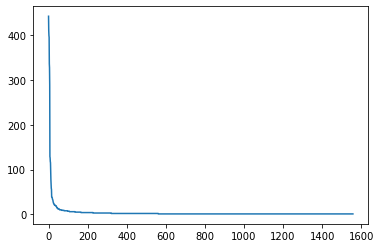

In [51]:
#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

Note: this graph turns at a much quicker rate than thatfor the whitehouse reports in the example... zipfs law here explains that the frequently occuring words are *very* frequent and the common words are infrequent (and this change is abrupt shows that there are few middleground/goldilocks words)

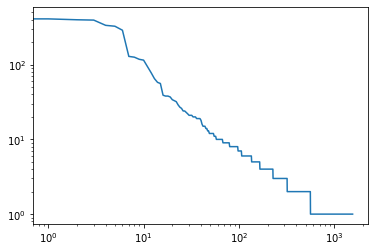

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

Now that I have an overview of the data, I'll use NLTK and regex to take a closer look

In [56]:
import nltk
import re

In [61]:
ktdnText = nltk.Text(alltweets)

KTIndex = nltk.text.ConcordanceIndex(ktdnText) 
KTIndex.print_concordance('justice')
#ktdnText.count('Katahdin')
#Katahdin appears 393 times

no matches


In [59]:
ktdnText.common_contexts(['friends'])

monument_group the_of monument_of resources_of organization_of you_of
summer_of promote_of of_of


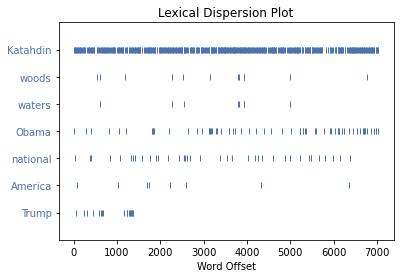

In [66]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
ktdnText.dispersion_plot(['Katahdin','woods', 'waters', 'Obama' ,'national', 'America', 'Trump'])
sns.set() #Re-enabling seaborn

Since these are tweets, I'm interested in seeing who is tagged and which hashtags are used

In [79]:
#create a string for regexpressions
regexStr = ''
for word in alltweets:
    regexStr += word + ' '
    
#regexStr

In [81]:
import re

In [87]:
preHashtag = r'#\w*'
preTag = r'@\w*'
ktdn_hashtags = re.findall(preHashtag, regexStr)
#ktdn_hashtags
ktdn_tags = re.findall(preTag, regexStr)
ktdn_tags_counted = wordCounter(ktdn_tags)
ktdn_tags_counted.sort_values('count',ascending=False,inplace=True)
ktdn_tags_counted
#ktdn_tags_text =nltk.Text(ktdn_tags)


,word,count
1,@potus,38
34,@natlparkservice,10
21,@youtube,8
2,@bangordailynews,5
68,@magazineofmaine,4
...,...,...
30,@wabi_tv5,1
29,@mpbnnews,1
28,@nytimestravel,1
27,@themdislander,1


## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

In [98]:
countsDict = {}
for word in df_ktdn['tokenized_tweet'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:30]

[('and', 431),
 ('Woods', 396),
 ('Katahdin', 393),
 ('Waters', 385),
 ('National', 295),
 ('Monument', 283),
 ('the', 249),
 ('of', 127),
 ('to', 123),
 ('Maine', 113),
 ('in', 104),
 ('a', 83),
 ('Obama', 64),
 ('new', 60),
 ("'s", 56),
 ('for', 53),
 ('monument', 42),
 ('The', 40),
 ('national', 38),
 ('is', 38),
 ('@POTUS', 38),
 ('NPS100', 32),
 ('on', 31),
 ('President', 31),
 ('you', 29),
 ('Park', 26),
 ('our', 25),
 ('via', 24),
 ('added', 24),
 ('Thank', 23)]

We'll cut off all words with len <= 3 since they are so mixed

In [102]:
#The stop list is then all words with len <= 3
# or freq < 30
stop_words_freq = []
for word, count in word_counts:
    #print(word, count)
    if len(word) <= 3 and count > 30:
        stop_words_freq.append(word)
    elif count < 30:
        break
stop_words_freq

and 431
Woods 396
Katahdin 393
Waters 385
National 295
Monument 283
the 249
of 127
to 123
Maine 113
in 104
a 83
Obama 64
new 60
's 56
for 53
monument 42
The 40
national 38
is 38
@POTUS 38
NPS100 32
on 31
President 31
you 29


['and', 'the', 'of', 'to', 'in', 'a', 'new', "'s", 'for', 'The', 'is', 'on']

In [103]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [104]:
#now we can remove the frequent stop words
#non stop words are 'normalized tokens'
df_ktdn['normalized_tokens'] = df_ktdn['tokenized_tweet'].apply(lambda x: normalizeTokens(x))

df_ktdn['normalized_tokens_count'] = df_ktdn['normalized_tokens'].apply(lambda x: len(x))

df_ktdn.head()

,ScreenName,Name,tweet,Links,hashtags,month,day,replies,retweets,likes,tokenized_tweet,word_counts,normalized_tokens,normalized_tokens_count
0,KJOnline,KennebecJournal,Are you pleased with Obama's creation of Katah...,http://www.centralmaine.com/2016/08/24/obama-c...,0,Mar,24.0,NaN,NaN,NaN,"[Are, you, pleased, with, Obama, 's, creation,...",14,"[pleased, obama, creation, katahdin, wood, wat...",8
1,Mainebiz,Mainebiz,Friends group launched to support new Katahdin...,http://ow.ly/nU1L309u0rF,0,Mar,1.0,0.0,1.0,9.0,"[Friends, group, launched, to, support, new, K...",12,"[friend, group, launch, support, new, katahdin...",10
2,LewistonSuper,BillWebster,Two days in Baxter State Park and Katahdin Woo...,NaN,0,Mar,19.0,0.0,0.0,11.0,"[Two, days, in, Baxter, State, Park, and, Kata...",15,"[day, baxter, state, park, katahdin, wood, wat...",10
3,MTreeBandit,MidnightTreeBandit,Replying to @ndngenuity Maine's governor is as...,NaN,0,Mar,22.0,0.0,1.0,1.0,"[Replying, to, @ndngenuity, Maine, 's, governo...",18,"[reply, @ndngenuity, maine, governor, ask, tru...",12
4,JenDickson,JenniferDickson,Opinion: Katahdin Woods & Waters is part of wh...,http://bit.ly/2nvVn1Z,#MonumentsForAll,Mar,29.0,0.0,0.0,0.0,"[Opinion, Katahdin, Woods, Waters, is, part, o...",14,"[opinion, katahdin, woods, water, make, maine,...",9


In [106]:
#.sum() adds together the lists from each row into a single list

#look at conditional frequency - frequency of one word on the appearance of another in the data
ktdnCFdist = nltk.ConditionalFreqDist(((len(w), w) for w in df_ktdn['normalized_tokens'].sum()))

#print the number of words: 4864
print(ktdnCFdist.N())

4864


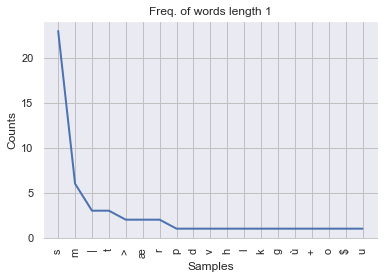

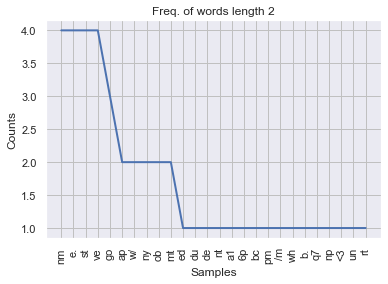

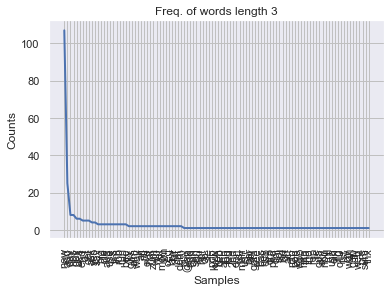

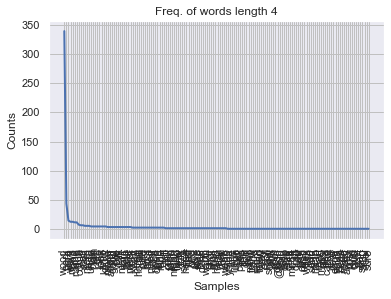

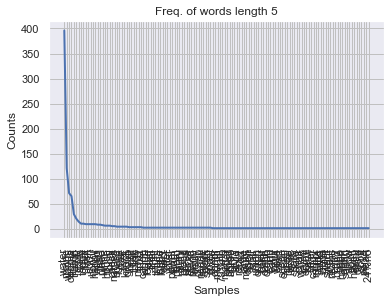

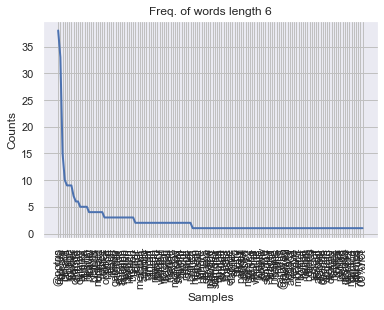

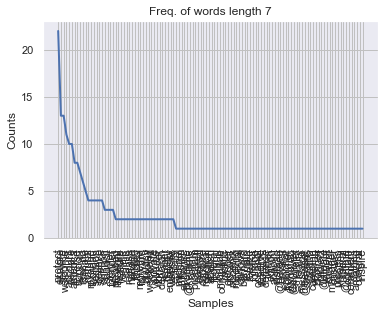

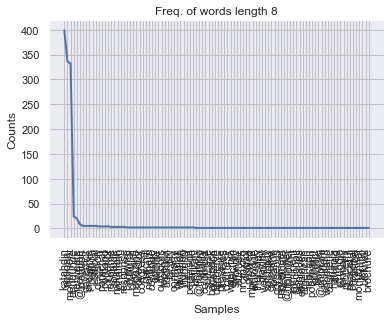

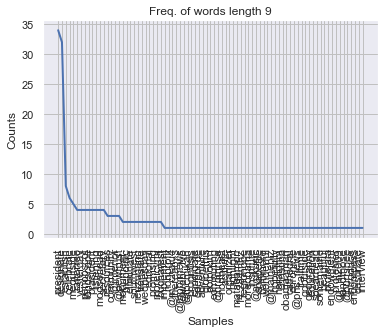

In [111]:
#now we can plot the distributions of word length
for i in range(1,10):
    ktdnCFdist[i].plot(title = "Freq. of words length " + str(i))

In [113]:
#Conditional Probability on the expected likelihood estimate
ktdnCPdist = nltk.ConditionalProbDist(ktdnCFdist, nltk.ELEProbDist)

#print the most common N letter word
for N in range(1,15):
    print("for length", N, "most common word is:")
    print(ktdnCPdist[N].max())
#And its probability
    print(ktdnCPdist[N].prob(ktdnCPdist[N].max()))

#will print the most common N letter word and it's probability

for length 1 most common word is:
s
0.376
for length 2 most common word is:
nm
0.07758620689655173
for length 3 most common word is:
new
0.2986111111111111
for length 4 most common word is:
wood
0.4105199516324063
for length 5 most common word is:
water
0.3747637051039698
for length 6 most common word is:
@potus
0.08922363847045191
for length 7 most common word is:
protect
0.07075471698113207
for length 8 most common word is:
katahdin
0.30173716012084595
for length 9 most common word is:
president
0.1411042944785276
for length 10 most common word is:
designates
0.08241758241758242
for length 11 most common word is:
designation
0.06074766355140187
for length 12 most common word is:
findyourpark
0.14619883040935672
for length 13 most common word is:
monumentforme
0.19148936170212766
for length 14 most common word is:
superintendent
0.08064516129032258


In [114]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [115]:
df_ktdn['normalized_tokens_POS'] = [spacy_pos(t) for t in df_ktdn['tweet']]

In [119]:
df_ktdn['normalized_tokens_POS'].sum()[:20]

[('are', 'VBP'),
 ('you', 'PRP'),
 ('pleased', 'JJ'),
 ('with', 'IN'),
 ('obama', 'NNP'),
 ("'s", 'POS'),
 ('creation', 'NN'),
 ('of', 'IN'),
 ('katahdin', 'NNP'),
 ('woods', 'NNS'),
 ('and', 'CC'),
 ('waters', 'VBZ'),
 ('national', 'JJ'),
 ('monument', 'NN'),
 ('?', '.'),
 ('friends', 'NNS'),
 ('group', 'NN'),
 ('launched', 'VBD'),
 ('to', 'TO'),
 ('support', 'VB')]

In [120]:
ktdnCFdist_WordtoPOS = nltk.ConditionalFreqDist(df_ktdn['normalized_tokens_POS'].sum())
list(ktdnCFdist_WordtoPOS.items())[:10]

[('are', FreqDist({'VBP': 9})),
 ('you', FreqDist({'PRP': 32})),
 ('pleased', FreqDist({'JJ': 2})),
 ('with', FreqDist({'IN': 16})),
 ('obama', FreqDist({'NNP': 60, 'NN': 5})),
 ("'s", FreqDist({'POS': 40, 'VBZ': 15, 'PRP': 1})),
 ('creation', FreqDist({'NN': 5})),
 ('of', FreqDist({'IN': 129})),
 ('katahdin', FreqDist({'NNP': 398})),
 ('woods', FreqDist({'NNS': 356, 'NNP': 53}))]

Above is the frequency of each word as each part of speech - below is the converse: the frequency of each part of speech for each word

In [121]:
#gives frequency of word AS it's part of speech (see below for each part of speech)
ktdnCFdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in df_ktdn['normalized_tokens_POS'].sum())

In [149]:
#returns the most common nouns
#ktdnCFdist_POStoWord['NN'].most_common(5)
prts_of_speech = {}
for speechtype in ['NN', 'VB', 'JJ']:
    prts_of_speech[speechtype] = ktdnCFdist_POStoWord[speechtype].most_common(50)

In [150]:
prt_speech_df = pd.DataFrame(prts_of_speech)
prt_speech_df.head()

,NN,VB,JJ
0,"(monument, 265)","(be, 19)","(national, 251)"
1,"(#, 29)","(trump, 8)","(new, 49)"
2,"(park, 11)","(protect, 6)","(happy, 9)"
3,"(today, 10)","(visit, 6)","(public, 8)"
4,"(findyourpark, 10)","(rescind, 5)","(first, 8)"


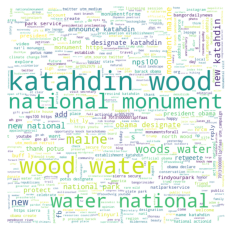

In [124]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(df_ktdn['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("katahdin_word_cloud.pdf", format = 'pdf')

Above is a word cloud of all tokenized words, most of the big words are used to refer to the event (when the Kathadin Woods and Waters (monument) became a National Monument under President Obama in 2016 (tweets collected march 2016). It is intuitive that tweets with an average length of 19 words would need to explcitiyl reference the event (additionally, these tweets were collected using keywords -many of which are displayed in the wordl)

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [172]:
def tag_sents_pos(tweet):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    
    #print("sent=", sent)
    doc = nlp(tweet)
    pos_sent = []
    for token in doc:
        #print("token.text =", token.text, "token.tag = ", token.tag_)
        pos_sent.append((token.text, token.tag_))
    
    return pos_sent

In [173]:
#df_ktdn['tweet'][1]
#tagged_tweets = tag_sents_pos(df_ktdn['tweet'])
#tagged_tweets

In [174]:
df_ktdn['POS_tagged'] = df_ktdn['tweet'].apply(lambda x: tag_sents_pos(x))

In [175]:
df_ktdn.head()

,ScreenName,Name,tweet,Links,hashtags,month,day,replies,retweets,likes,tokenized_tweet,word_counts,normalized_tokens,normalized_tokens_count,normalized_tokens_POS,POS_tagged
0,KJOnline,KennebecJournal,Are you pleased with Obama's creation of Katah...,http://www.centralmaine.com/2016/08/24/obama-c...,0,Mar,24.0,NaN,NaN,NaN,"[Are, you, pleased, with, Obama, 's, creation,...",14,"[pleased, obama, creation, katahdin, wood, wat...",8,"[(are, VBP), (you, PRP), (pleased, JJ), (with,...","[(Are, VBP), (you, PRP), (pleased, JJ), (with,..."
1,Mainebiz,Mainebiz,Friends group launched to support new Katahdin...,http://ow.ly/nU1L309u0rF,0,Mar,1.0,0.0,1.0,9.0,"[Friends, group, launched, to, support, new, K...",12,"[friend, group, launch, support, new, katahdin...",10,"[(friends, NNS), (group, NN), (launched, VBD),...","[(Friends, NNS), (group, NN), (launched, VBD),..."
2,LewistonSuper,BillWebster,Two days in Baxter State Park and Katahdin Woo...,NaN,0,Mar,19.0,0.0,0.0,11.0,"[Two, days, in, Baxter, State, Park, and, Kata...",15,"[day, baxter, state, park, katahdin, wood, wat...",10,"[(two, CD), (days, NNS), (in, IN), (baxter, NN...","[(Two, CD), (days, NNS), (in, IN), (Baxter, NN..."
3,MTreeBandit,MidnightTreeBandit,Replying to @ndngenuity Maine's governor is as...,NaN,0,Mar,22.0,0.0,1.0,1.0,"[Replying, to, @ndngenuity, Maine, 's, governo...",18,"[reply, @ndngenuity, maine, governor, ask, tru...",12,"[(replying, VBG), (to, IN), (@ndngenuity, NNP)...","[(Replying, VBG), (to, IN), (@ndngenuity, NNP)..."
4,JenDickson,JenniferDickson,Opinion: Katahdin Woods & Waters is part of wh...,http://bit.ly/2nvVn1Z,#MonumentsForAll,Mar,29.0,0.0,0.0,0.0,"[Opinion, Katahdin, Woods, Waters, is, part, o...",14,"[opinion, katahdin, woods, water, make, maine,...",9,"[(opinion, NN), (:, :), (katahdin, NNP), (wood...","[(Opinion, NN), (:, :), (Katahdin, NNP), (Wood..."


In [177]:
#count the frequency of each noun
countTarget = 'NN'
targetCounts = {}
for entry in df_ktdn['POS_tagged']:
    
    for ent, kind in entry:
        if kind != countTarget:
            continue
        elif ent in targetCounts:
            targetCounts[ent] += 1
        else:
            targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('monument', 41),
 ('#', 32),
 ('news', 11),
 ('account', 10),
 ('park', 10),
 ('land', 9),
 ('video', 7),
 ('Obama', 6),
 ('end', 5),
 ('site', 5),
 ('area', 5),
 ('Today', 5),
 ('day', 5),
 ('honor', 5),
 ('creation', 4),
 ('decision', 4),
 ('beauty', 4),
 ('monumentsforall', 4),
 ('number', 4),
 ('landscape', 4)]

above is really interesting information about the most common (tagged) nouns in the corpus - I am surprised that in the midst of a controversial decision (to create a national monument) that so much seems to still be about the landscape and beauty of the land

In [187]:
#df_ktdn['POS_tagged'][0][0]

In [186]:
# and find adjectives that modify interesting words
NTarget = 'JJ'
Words = ['katahdin', 'park', 'monument', 'land', 'national', 'obama']
NResults_dict = {}
for term in Words:
    NResults_dict[term] = set()
    
for entry in df_ktdn['POS_tagged']:
    for (ent1, kind1),(ent2,kind2) in zip(entry[:-1], entry[1:]):
        #if (kind1,ent2.lower())==(NTarget,Word):
        if kind1 == NTarget and ent2.lower() in Words:
            NResults_dict[ent2.lower()].add(ent1)
        else:
            continue

print(NResults_dict)  

{'katahdin': {'German', 'new'}, 'park': {'veteran', '413th', 'national'}, 'monument': {'national', 'new'}, 'land': {'federal'}, 'national': {'New', 'new'}, 'obama': set()}


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

In [189]:
ktdnBigrams = nltk.collocations.BigramCollocationFinder.from_words(df_ktdn['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(ktdnBigrams.N))
#4864

There are 4864 bigrams in the finder


In [190]:
def bigramScoring(count, wordsTuple, total):
    return count

print(ktdnBigrams.nbest(bigramScoring, 10))

[('wood', 'water'), ('katahdin', 'wood'), ('national', 'monument'), ('water', 'national'), ('katahdin', 'woods'), ('woods', 'water'), ('new', 'katahdin'), ('new', 'national'), ('monument', 'maine'), ('national', 'park')]


In [192]:
#bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
ktdnBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('wood', 'water'), 1973.1753235994865),
 (('katahdin', 'wood'), 1873.2611726931552),
 (('national', 'monument'), 1691.281984634703),
 (('water', 'national'), 1164.7336104163542),
 (('katahdin', 'woods'), 315.8924830647355),
 (('woods', 'water'), 306.39205747759553),
 (('thank', '@potus'), 158.67913345266442),
 (('obama', 'designate'), 158.66539381008093),
 (('park', 'service'), 126.59376984649718),
 (('announce', 'katahdin'), 108.12112225035494),
 (('president', 'obama'), 104.75739579592535),
 (('national', 'park'), 96.32684800775849),
 (('baxter', 'state'), 93.38452295387896),
 (('white', 'house'), 92.36687909204473),
 (('new', 'katahdin'), 85.18761871253449),
 (('proclamation', 'establishment'), 80.88403395678768),
 (('end', 'a.t'), 78.79664354741016),
 (('@potus', 'name'), 76.18295686489958),
 (('climate', 'change'), 73.38990904101448),
 (('designate', 'katahdin'), 73.03851756757726),
 (('adam', 'e.'), 64.82328612443459),
 (('believe', 'science'), 64.82328612443459),
 (('branch', 

In [259]:
#other N-grams
N = 4
Ngrams = nltk.ngrams(df_ktdn['normalized_tokens'].sum(), N)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

dict

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [196]:
def tag_sents_ner(tweet):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    doc = nlp(tweet)
    pos_sent = []
    for ent in doc.ents:
        pos_sent.append((ent.text, ent.label_))
    
    return pos_sent

In [198]:
test_tweet = df_ktdn['tweet'][1]

In [199]:
tag_sents_ner(test_tweet)

[('Katahdin Woods', 'ORG'), ('Waters', 'ORG')]

In [200]:
df_ktdn['classified_tweets'] = df_ktdn['tweet'].apply(lambda x: tag_sents_ner(x))

In [202]:
#df_ktdn.head()

In [203]:
entityCounts = {}
for entry in df_ktdn['classified_tweets']:
    for ent, kind in entry:
        if ent in entityCounts:
            entityCounts[ent] += 1
        else:
            entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('Katahdin Woods', 232),
 ('Waters National Monument', 132),
 ('Maine', 101),
 ('the Katahdin Woods', 63),
 ('Waters', 57),
 ('#', 34),
 ('@POTUS', 21),
 ('Obama', 20),
 ('Katahdin Woods & Waters', 9),
 ('Katahdin', 9)]

above are the most common entities (as labeled)
below are those occuring only M times

In [207]:
M = 4
[x[0] for x in sortedEntities if x[1] == M]

['LePage',
 'Barack Obama',
 'one',
 'Waters National Monument"',
 'Roxanne Quimby',
 'Thoreau',
 'today',
 'The Katahdin Woods',
 'Interior',
 'North Woods',
 'Natl Monument']

Thoreau is a surprise here! ... interesting

In [208]:
NERtypeCounts = {}
for entry in df_ktdn['classified_tweets']:
    for ent, kind in entry:
        if kind in NERtypeCounts:
            NERtypeCounts[kind] += 1
        else:
            NERtypeCounts[kind] = 1
sortedEntities = sorted(NERtypeCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('ORG', 612),
 ('PERSON', 278),
 ('GPE', 155),
 ('CARDINAL', 55),
 ('DATE', 52),
 ('MONEY', 24),
 ('NORP', 22),
 ('ORDINAL', 15),
 ('PRODUCT', 15),
 ('QUANTITY', 14)]

Here, we see that the most common Named Entity label types in this corpus are (as follows): Organizations, people, Geopolitical entities, "numerals that do not fall under another type", dates, monetary values, nationalities or religious or political groups. This distribution suggests that the tweets are largely focused on / talking about organizations, people and geopolitical entities - which makes a lot of sense in the process of a physcial plot of land moving from private ownership to national monument.... I am interested by the NORP lable... which group might they be referring to...

In [210]:
NORPCounts = {}
for entry in df_ktdn['classified_tweets']:
    for ent, kind in entry:
        entL = ent.lower()
        if kind == 'NORP':
            if entL in NORPCounts:
                NORPCounts[entL] += 1
            else:
                NORPCounts[entL] = 1
sortedEntities = sorted(NORPCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('@potus', 6),
 ('republicans', 5),
 ('nps100', 5),
 ('french', 3),
 ('american', 1),
 ('german', 1),
 ('monumentforme', 1)]

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [211]:
from spacy import displacy

In [244]:
#df_ktdn.head()
#tester
D = 1
df_ktdn['tweet'][D]
doc = nlp(df_ktdn['tweet'][D])
displacy.render(doc, style='dep')

We will be using spaCy's built in dependancy parser to go about exploring the tree.
Note that unlike previous examples, large corpuses or collections of sentences don't give us as much information, so we will be navigating smaller sentences.

Let us start by exploring noun chunks. Noun chunks are “base noun phrases” – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. To get the noun chunks in a document, simply iterate over the sentences noun chunks.

In [238]:
data = {'ScreenName': df_ktdn['ScreenName'][:5], 'tweet': df_ktdn['tweet'][:5],'word_counts': df_ktdn['word_counts'][:5],'tokenized_tweet': df_ktdn['tokenized_tweet'][:5]}
mini_df =pd.DataFrame(data)
mini_df

,ScreenName,tweet,word_counts,tokenized_tweet
0,KJOnline,Are you pleased with Obama's creation of Katah...,14,"[Are, you, pleased, with, Obama, 's, creation,..."
1,Mainebiz,Friends group launched to support new Katahdin...,12,"[Friends, group, launched, to, support, new, K..."
2,LewistonSuper,Two days in Baxter State Park and Katahdin Woo...,15,"[Two, days, in, Baxter, State, Park, and, Kata..."
3,MTreeBandit,Replying to @ndngenuity Maine's governor is as...,18,"[Replying, to, @ndngenuity, Maine, 's, governo..."
4,JenDickson,Opinion: Katahdin Woods & Waters is part of wh...,14,"[Opinion, Katahdin, Woods, Waters, is, part, o..."


In [242]:
from spacy.symbols import nsubj, VERB

In [245]:
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{launched}


In [246]:
root = [token for token in doc if token.head == token][0]
subject = list(root.lefts)[0]
for descendant in subject.subtree:
    assert subject is descendant or subject.is_ancestor(descendant)
    print(descendant.text, descendant.dep_, descendant.n_lefts,
            descendant.n_rights,
            [ancestor.text for ancestor in descendant.ancestors])

Friends compound 0 0 ['group', 'launched']
group nsubj 1 0 ['launched']


In [247]:
span = doc[doc[4].left_edge.i : doc[4].right_edge.i+1]
with doc.retokenize() as retokenizer:
    retokenizer.merge(span)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

Friends NOUN compound group
group NOUN nsubj launched
launched VERB ROOT launched
to support new Katahdin Woods and Waters national monument VERB xcomp launched
. PUNCT punct launched


In [248]:
displacy.render(doc, style='dep')

In [250]:
#lets find some VERBS
countTarget = 'VB'
targetCountsVB = {}
for entry in df_ktdn['POS_tagged']:
    
    for ent, kind in entry:
        entL = ent.lower()
        if kind == countTarget:
            if entL in targetCountsVB:
                targetCountsVB[entL] += 1
            else:
                targetCountsVB[entL] = 1
sortedTargetsVB = sorted(targetCountsVB.items(), key = lambda x: x[1], reverse = True)
sortedTargetsVB[:20]

[('be', 19),
 ('reverse', 8),
 ('protect', 6),
 ('visit', 6),
 ('sign', 6),
 ('rescind', 5),
 ('https://youtu.be/0fsovx0vxlg', 5),
 ('trump', 5),
 ('get', 4),
 ('join', 4),
 ('have', 4),
 ('support', 3),
 ('see', 3),
 ('check', 3),
 ('explore', 3),
 ('make', 3),
 ('establish', 3),
 ('give', 3),
 ("'ve", 3),
 ('@potus', 3)]

In [266]:
tweet_term = {}

In [267]:
term = 'protect'
for index, row in df_ktdn.iterrows():
    text = ' '.join(row['tokenized_tweet'])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is kill
        if chunk.root.head.text == term:
            tweet_term[row['ScreenName']] = ([], [])
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                tweet_term[row['ScreenName']][0].append(subject)
            if object_ is not 0:
                tweet_term[row['ScreenName']][1].append(object_)

<>:16: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:16: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-267-41edc6cc4c3d>:16: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if subject is not 0:
<ipython-input-267-41edc6cc4c3d>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if object_ is not 0:


In [268]:
tweet_term

{'maineinsights': ([], ['vitality']),
 'writingMaine': ([], []),
 'NRCMenvironment': ([], ['Woods']),
 'MonumentForME': ([], ['Woods']),
 'UrsaMajorVT': ([], ['land']),
 'CotoniCoastDNM': ([], ['place'])}

We can see in these that 'protect' in the tweet corpus is used in the public preaching sense- as in a command to "Protect Woods", "Protect Vitality".. (since there is no subject, just an object to protect for 5/6 tweets)

## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

In [297]:
#testing
cols = ['ScreenName', 'Name', 'tweet', 'links', 'hashtags', 'month', 'day', 'replies', 'reweets', 'likes', 'tokenized_tweet', 'word_counts', 'normalized_tokens', 'normalized_tokens_count', 'normalized_tokens_POS', 'POS_tagged', 'classified_tweets']
obama_df = pd.DataFrame(columns=cols)
#.loc[1] = (df_ktdn.iloc[1])
obama_df = obama_df.append(df_ktdn.iloc[1])
#df_ktdn.loc[1]
obama_df.head()

,ScreenName,Name,tweet,links,hashtags,month,day,replies,reweets,likes,tokenized_tweet,word_counts,normalized_tokens,normalized_tokens_count,normalized_tokens_POS,POS_tagged,classified_tweets,Links,retweets
1,Mainebiz,Mainebiz,Friends group launched to support new Katahdin...,NaN,0,Mar,1.0,0.0,NaN,9.0,"[Friends, group, launched, to, support, new, K...",12,"[friend, group, launch, support, new, katahdin...",10,"[(friends, NNS), (group, NN), (launched, VBD),...","[(Friends, NNS), (group, NN), (launched, VBD),...","[(Katahdin Woods, ORG), (Waters, ORG)]",http://ow.ly/nU1L309u0rF,1.0


In [298]:
cols = ['ScreenName', 'Name', 'tweet', 'links', 'hashtags', 'month', 'day', 'replies', 'reweets', 'likes', 'tokenized_tweet', 'word_counts', 'normalized_tokens', 'normalized_tokens_count', 'normalized_tokens_POS', 'POS_tagged', 'classified_tweets']

obama_df = pd.DataFrame(columns = cols)
trump_df = pd.DataFrame(columns = cols)
for i in range(len(df_ktdn)):
    if 'obama' in df_ktdn['normalized_tokens'][i]:
        obama_df = obama_df.append(df_ktdn.iloc[i])
        #print("Obama:", df_ktdn['tweet'][i])
    elif 'trump' in df_ktdn['normalized_tokens'][i]:
        trump_df = trump_df.append(df_ktdn.iloc[i])

In [324]:
cols = ['ScreenName', 'Name', 'tweet', 'links', 'hashtags', 'month', 'day', 'replies', 'reweets', 'likes', 'tokenized_tweet', 'word_counts', 'normalized_tokens', 'normalized_tokens_count', 'normalized_tokens_POS', 'POS_tagged', 'classified_tweets']
maine_foc = pd.DataFrame(columns = cols)
ntnl_foc = pd.DataFrame(columns = cols)
for i in range(len(df_ktdn)):
    if 'maine' in df_ktdn['normalized_tokens'][i] or 'state' in df_ktdn['normalized_tokens'][i]:
        maine_foc = maine_foc.append(df_ktdn.iloc[i])
    if 'national' in df_ktdn['normalized_tokens'][i] or 'america' in df_ktdn['normalized_tokens'][i] or 'federal' in df_ktdn['normalized_tokens'][i]:
        ntnl_foc = ntnl_foc.append(df_ktdn.iloc[i])

In [302]:
len(trump_df['Name']) # 14 tweets referencing trump
#len(obama_df['Name']) # 55 tweets referencing obama 

14

In [326]:
#len(ntnl_foc['Name']) # 287 tweets focused on national level
len(maine_foc['Name']) # 108 tweets focused on state level

108

Now we need to compare the two collection of words, remove those not found in both, and assign the remaining ones indices.

In [328]:
trumpWords = set(trump_df['normalized_tokens'].sum())
obamaWords = set(obama_df['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = trumpWords & obamaWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict

{'penobscot': 0,
 'monument': 1,
 'e.': 2,
 'retweete': 3,
 'oppose': 4,
 'ratterree': 5,
 'trump': 6,
 'republicans': 7,
 'maine': 8,
 'want': 9,
 'final': 10,
 'governor': 11,
 'add': 12,
 'adam': 13,
 'branch': 14,
 'utah': 15,
 'water': 16,
 'undo': 17,
 'result': 18,
 'establish': 19,
 'river': 20,
 'vote': 21,
 'reply': 22,
 'wood': 23,
 'katahdin': 24,
 'national': 25,
 'east': 26,
 'big': 27,
 'president': 28,
 'create': 29,
 'thank': 30}

In [330]:
ntnlWords = set(ntnl_foc['normalized_tokens'].sum())
maineWords = set(maine_foc['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords1 = ntnlWords & maineWords

overlapWordsDict1 = {word: index for index, word in enumerate(overlapWords1)}
#overlapWordsDict1

Now we can count the occurrences of each word in the corpora and create our arrays. Note that we don't have to use numpy arrays as we do here. We could just use a list, but the arrays are faster in numpy so we encourage you to get in the habit of using them.

In [331]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

obamaProbArray = makeProbsArray(obama_df['normalized_tokens'], overlapWordsDict)
trumpProbArray = makeProbsArray(trump_df['normalized_tokens'], overlapWordsDict)
trumpProbArray.sum()

maineProbArray = makeProbsArray(maine_foc['normalized_tokens'], overlapWordsDict1)
ntnlProbArray = makeProbsArray(ntnl_foc['normalized_tokens'], overlapWordsDict1)
ntnlProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

0.9999999999999999

We can now compute the KL divergence. Pay attention to the asymmetry. Use [the Jensen–Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence), which is the average KL divergence between each distribution and the average of both distributions (i.e., the midpoint), if you want symmetry.

In [307]:
t_o_Divergence = scipy.stats.entropy(trumpProbArray, obamaProbArray)
print (t_o_Divergence) #0.5843125624945437
o_t_Divergence = scipy.stats.entropy(obamaProbArray, trumpProbArray)
print (o_t_Divergence) #0.26823823820000614

0.5843125624945437
0.26823823820000614


Significant difference in these values (whereas in example differeence was ~0.15 here it is ~0.3 ...) could be due to mismatched (and v small corpus size)

In [332]:
Divergence1 = scipy.stats.entropy(ntnlProbArray, maineProbArray)
print (Divergence1) #0.10535827888928834
Divergence2 = scipy.stats.entropy(maineProbArray, ntnlProbArray)
print (Divergence2) #0.10946731549211731

0.10535827888928834
0.10946731549211731


hmmmm note these are much smaller than the trump vs obama divergences

Then, we can do the elementwise calculation and see which words best distinguish the two corpora.

In [308]:
trump_obamaDivergence_ew = scipy.special.kl_div(trumpProbArray, obamaProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = trump_obamaDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,penobscot,0.002630
1,monument,0.008134
2,e.,0.005260
3,retweete,0.000475
4,oppose,0.002630
5,ratterree,0.005260
6,trump,0.384703
7,republicans,0.025352
8,maine,0.004867
9,want,0.012223


perhaps some level of consistency - the divergence of terms here is almost doublt that of the example

In [334]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
6,trump,0.384703
17,undo,0.040776
25,national,0.027970
7,republicans,0.025352
22,reply,0.012223
9,want,0.012223
1,monument,0.008134
24,katahdin,0.006509
16,water,0.006509
5,ratterree,0.005260


Although here there is aBIG divergence - which is interesting when thinking about the 'unique' propertieis and usage of words by the two people and their respective parties (i.e. interesting that 'undo' (although likely because the move to a national monumnet was to protect the land from builders, etc, ) is divergent (is this a sign of controversial?)

In [333]:
ntnl_meDivergence_ew = scipy.special.kl_div(ntnlProbArray, maineProbArray)
kl_df1 = pandas.DataFrame(list(overlapWordsDict1.keys()), columns = ['word'], index = list(overlapWordsDict1.values()))
kl_df1 = kl_df1.sort_index()
kl_df1['elementwise divergence'] = ntnl_meDivergence_ew
kl_df1[:10]

,word,elementwise divergence
0,reverse,0.000067
1,hope,0.000064
2,region,0.000478
3,monument,0.005554
4,quimby,0.000016
5,baxter,0.000451
6,barack,0.000121
7,mepolitics,0.000064
8,green,0.000129
9,abroad,0.000064


In [335]:
kl_df1.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
293,maine,0.010546
526,national,0.008408
3,monument,0.005554
187,katahdin,0.004635
14,water,0.004238
509,name,0.003831
532,announce,0.003330
186,wood,0.002512
344,https://youtu.be/0fsovx0vxlg,0.001314
12,nps100,0.001242


Now we will apply what we learned today 
First, let's transform every text into normalized tokens. Note that in this first step, no stopword is removed.
We'll use only the first 11 movies: you are welcome to try more.

In [312]:
corpora = []
for index, row in df_ktdn.iterrows():
    if len(corpora) > 10:
        break
    corpora.append(row['tokenized_tweet'])

Then, let's separate the normalized tokens into stopwords and non-stopwords.

In [313]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)

Define some covenient funtions for calculating divergence and distances.

In [314]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

Now we will calculate the KL divergence for each pair of corpora, turn the results into a matrix, and visualize the matrix as a heatmap. Recall that $D_{\mathrm{KL}}(P\|Q)$ measures the amount of information loss when $Q$ is used to approximate $P$. Here, the rows are the $P$s used for calculating KL divergences, and the columns are the $Q$s. So, each cell measures the amount of information loss when the word distribution of the column text is used to approximate the word distribution of the row text. Because the KL divergence is directional, such that the divergence of $P$ from $Q$ is different from the same of $Q$ from $P$, the matrix is assymetric and contains unique information above and below the diagonal. The same is true for the $\chi^2$ divergence.

In [315]:
len(corpora)

11

In [316]:
fileids = list(df_ktdn['ScreenName'])[0:11]

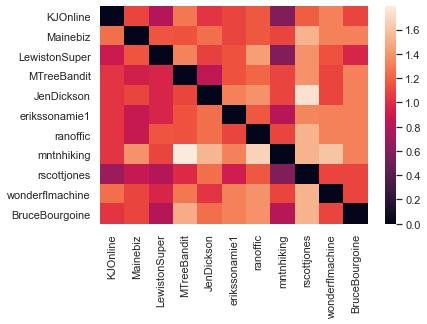

In [317]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()


To reveal more patterns, let's do a multidimensional scaling of the matrix.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


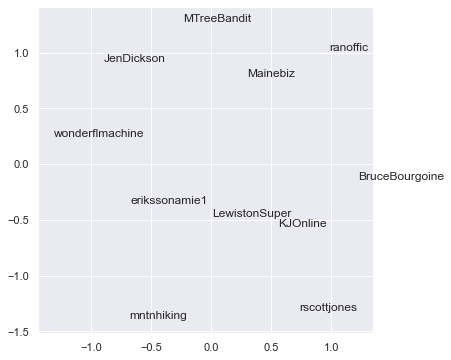

In [318]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2686: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


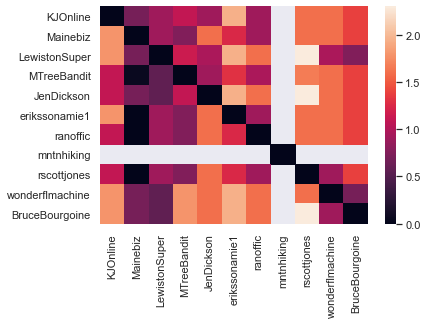

In [319]:
L = []
for p in corpora_s:
    l = []
    for q in corpora_s:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

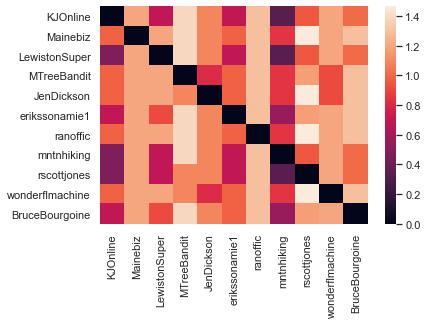

In [320]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Now we compute the same for the assymmetric $\chi^2$ Divergence.

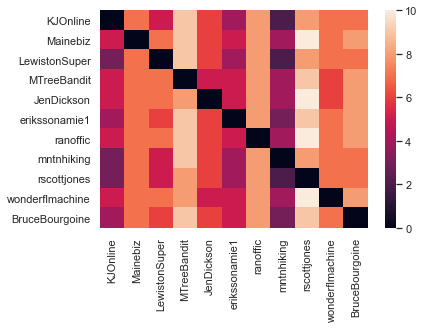

In [321]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

For the KS distance:

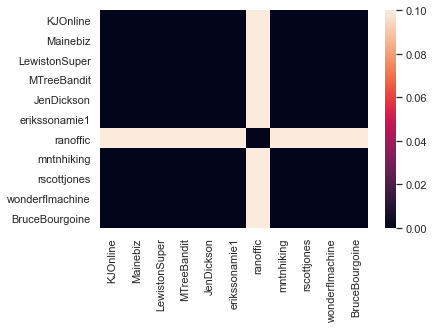

In [322]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

And finally for the Wasserstein or "earth mover's" Distance.

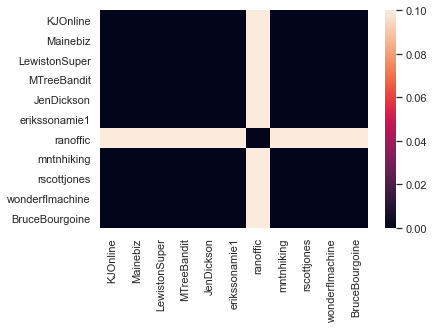

In [323]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

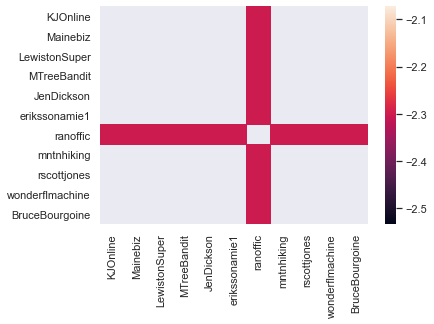

In [336]:
ax = sns.heatmap(div.apply(np.log).replace([np.inf, -np.inf], np.nan))
plt.show()

We only used 11 users here, which is a small sample